## Case Study - Churn Prediction

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of 
users who signed up for an account in January 2014. The data was pulled on July 1, 2014; 
we consider a user retained if they were “active” (i.e. took a trip) in 
the preceding 30 days (from the day the data was pulled). In other words, a user is "active"
if they have taken a trip since June 1, 2014. The data, `churn.csv`, is in the 
[data](data) folder.  The data are split into train and test sets.  You are encouraged
to tune and estimate your model's performance on the train set, then see how it does on
the unseen data in the test set at the end.

We would like you to use this data set to help understand **what factors are the best
predictors for retention**, and offer suggestions to operationalize those insights to 
help Company X. Therefore, your task is not only to build a model that minimizes error,
but also a model that allows you to interpret the factors that contributed to your predictions.

Here is a detailed description of the data:

```
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form `YYYYMMDD`
last_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`
avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips 
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday
```

## Work Flow

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
   data for this analysis.
   
2. Build a predictive model to help determine whether or not a user will be retained.

3. Evaluate the model.
 
4. Identify / interpret features that are the most influential in affecting your predictions.

5. Discuss the validity of your model. Issues such as [leakage.](https://www.kaggle.com/wiki/Leakage)

6. Repeat 2 - 5 until you have a satisfactory model.
   
## Deliverables

- Code you used to build the model.

- A presentation including the following points:
    - How did you compute the target?
    - What model did you use in the end? Why?
    - Alternative models you considered? Why are they not good enough?
    - What performance metric did you use? Why?
    - Based on insights from the model, what actionable plans do you propose to reduce churn?
    

## Step 1: EDA
### Identify ID, Input and Target features
### Identify categorical and numerical features
### Identify columns with missing values

In [4]:
datadict={"city": "city this user signed up in",
"phone": "primary device for this user",
"signup_date": "date of account registration; in the form `YYYYMMDD`",
"last_trip_date": "the last time this user completed a trip; in the form `YYYYMMDD`",
"avg_dist": "the average distance (in miles) per trip taken in the first 30 days after signup",
"avg_rating_by_driver": "the rider's average rating over all of their trips",
"avg_rating_of_driver": "the rider's average rating of their drivers over all of their trips", 
"surge_pct": "the percent of trips taken with surge multiplier > 1",
"avg_surge": "The average surge multiplier over all of this user's trips", 
"trips_in_first_30_days": "the number of trips this user took in the first 30 days after signing up",
"luxury_car_user": "TRUE if the user took a luxury car in their first 30 days; FALSE otherwise",
"weekday_pct":"the percent of the user's trips occurring during a weekday"}

In [327]:
datadict_df = pd.DataFrame.from_dict(datadict, orient='index').reset_index()
datadict_df.columns=["feature name", "feature description"]
datadict_df

,feature name,feature description
0,last_trip_date,the last time this user completed a trip; in the form `YYYYMMDD`
1,phone,primary device for this user
2,weekday_pct,the percent of the user's trips occurring during a weekday
3,avg_rating_by_driver,the rider's average rating over all of their trips
4,city,city this user signed up in
5,trips_in_first_30_days,the number of trips this user took in the first 30 days after signing up
6,signup_date,date of account registration; in the form `YYYYMMDD`
7,avg_rating_of_driver,the rider's average rating of their drivers over all of their trips
8,avg_surge,The average surge multiplier over all of this user's trips
9,surge_pct,the percent of trips taken with surge multiplier > 1


In [6]:
from imports import *

In [16]:
skl.__version__
%matplotlib inline

In [17]:
df = pd.read_csv("data/churn_train.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [19]:
df.head(7)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7


In [20]:
df_original = df.copy()

## Convert to Datetime

In [21]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


## Make target Variable:  
" a user is "active" if they have taken a trip since June 1, 2014."

In [23]:
df["active"] = df['last_trip_date'] > "2014-06-01"

False    25365
True     14635
Name: active, dtype: int64


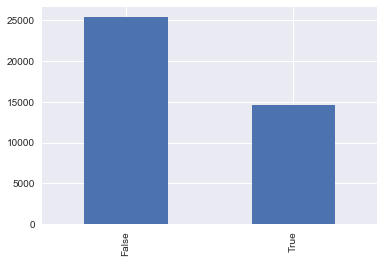

In [24]:
print df.active.value_counts()
df.active.value_counts().plot.bar()

In [25]:
dtype_dict = {"bool_list" : list(df.select_dtypes(include=['bool']).columns), \
              "cat_vars" : list(df.select_dtypes(include=['O']).columns), \
              "cont_vars" : list(df.select_dtypes(include=['int', 'float']).columns), \
              "date_vars" : list(df.select_dtypes(include=['datetime']).columns)}

In [26]:
dtype_dict

{'bool_list': ['luxury_car_user', 'active'],
 'cat_vars': ['city', 'phone'],
 'cont_vars': ['avg_dist',
  'avg_rating_by_driver',
  'avg_rating_of_driver',
  'avg_surge',
  'surge_pct',
  'trips_in_first_30_days',
  'weekday_pct'],
 'date_vars': ['last_trip_date', 'signup_date']}

In [27]:
for col in dtype_dict["cat_vars"]:
    print df[col].value_counts(dropna=False)
    print "\n",  "*" * 50

Winterfell        18620
Astapor           13236
King's Landing     8144
Name: city, dtype: int64

**************************************************
iPhone     27628
Android    12053
NaN          319
Name: phone, dtype: int64

**************************************************


In [28]:
%matplotlib inline

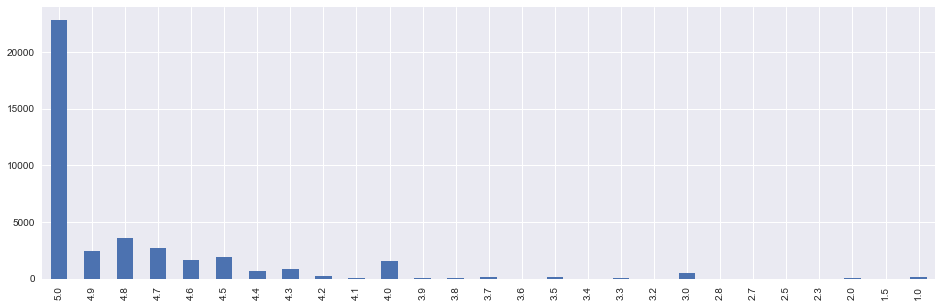

In [29]:
df["avg_rating_by_driver"].value_counts().sort_index(ascending=False).plot.bar(figsize=(16,5))

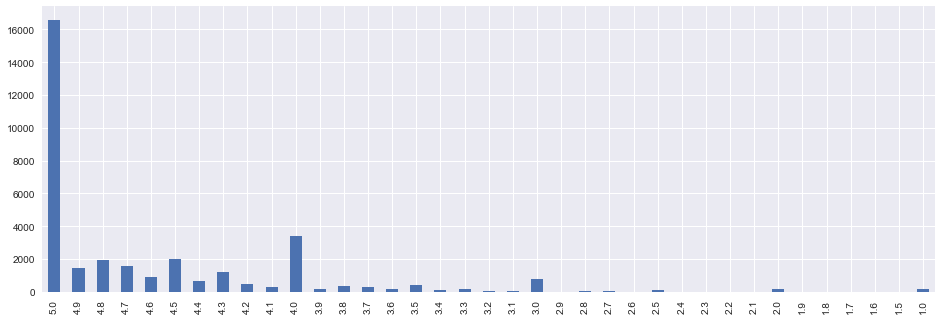

In [30]:
df["avg_rating_of_driver"].value_counts().sort_index(ascending=False).plot.bar(figsize=(16,5.25))

### 'avg_rating_by_driver': "the rider's average rating over all of their trips",  
### 'avg_rating_of_driver': "the rider's average rating of their drivers over all of their trips",

create difference feature?

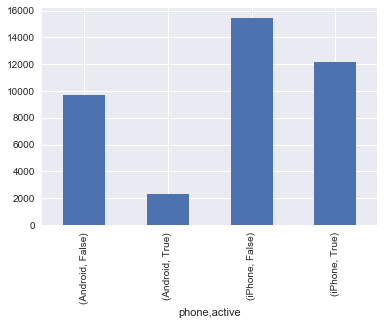

In [31]:
df.groupby(["phone", "active"]).count().iloc[:,0].plot.bar()

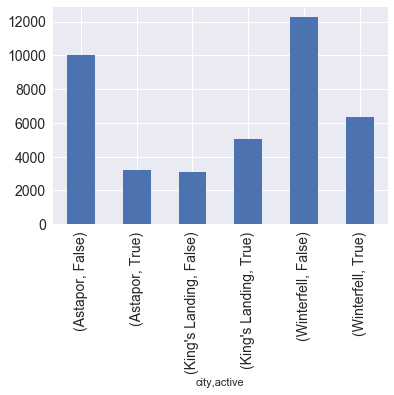

In [32]:
df.groupby(["city", "active"]).count().iloc[:,0].plot.bar(fontsize=14)

## Stage 2: Data Treatment (Missing values treatment):

### Step 5: Find missing values

In [33]:
df_before_impute = df.copy()

In [34]:
df_before_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null datetime64[ns]
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
active                    40000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 3.4+ MB


In [35]:
df.isnull().any()

avg_dist                  False
avg_rating_by_driver       True
avg_rating_of_driver       True
avg_surge                 False
city                      False
last_trip_date            False
phone                      True
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
luxury_car_user           False
weekday_pct               False
active                    False
dtype: bool

In [51]:
nan_props =(1- (df.count()/df.shape[0]))
nan_props

avg_dist                  0.0
avg_rating_by_driver      0.0
avg_rating_of_driver      0.0
avg_surge                 0.0
city                      0.0
last_trip_date            0.0
phone                     0.0
signup_date               0.0
surge_pct                 0.0
trips_in_first_30_days    0.0
luxury_car_user           0.0
weekday_pct               0.0
active                    0.0
dtype: float64

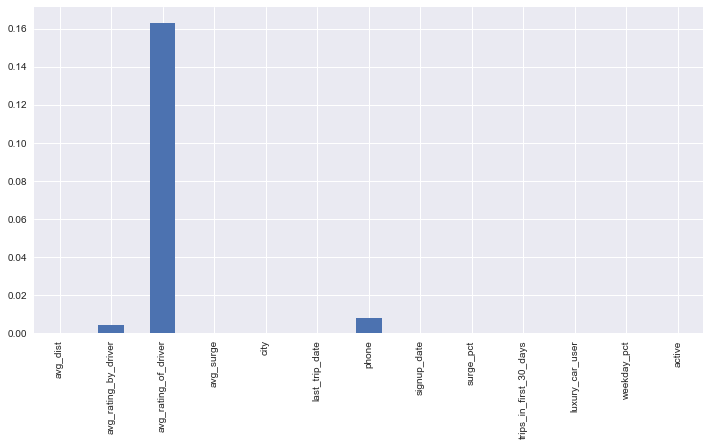

In [42]:
nan_props.plot.bar(figsize=(12,6))

### Step 6: Impute Missing values

In [43]:
mean_rating = df["avg_rating_of_driver"].mean()
mean_rating

4.601696940726505

In [44]:
#Impute numerical missing values with mean
df["avg_rating_of_driver"].fillna(mean_rating, inplace=True)

In [45]:
df["avg_rating_of_driver"].unique()

array([ 5.        ,  4.60169694,  4.        ,  4.7       ,  3.        ,
        3.7       ,  4.5       ,  3.3       ,  3.6       ,  4.3       ,
        4.6       ,  3.8       ,  4.1       ,  1.        ,  4.4       ,
        4.9       ,  3.5       ,  4.8       ,  2.        ,  3.1       ,
        3.4       ,  4.2       ,  2.8       ,  2.7       ,  2.5       ,
        3.9       ,  2.6       ,  1.9       ,  2.3       ,  3.2       ,
        2.9       ,  2.1       ,  1.7       ,  1.5       ,  2.4       ,
        2.2       ,  1.8       ,  1.6       ])

## Drop remainig NAs

In [46]:
df.dropna(axis=0, inplace=True)

In [47]:
df.shape

(39521, 13)

In [49]:
nan_props

avg_dist                  0.000000
avg_rating_by_driver      0.004050
avg_rating_of_driver      0.163200
avg_surge                 0.000000
city                      0.000000
last_trip_date            0.000000
phone                     0.007975
signup_date               0.000000
surge_pct                 0.000000
trips_in_first_30_days    0.000000
luxury_car_user           0.000000
weekday_pct               0.000000
active                    0.000000
dtype: float64

In [52]:
df.count()

avg_dist                  39521
avg_rating_by_driver      39521
avg_rating_of_driver      39521
avg_surge                 39521
city                      39521
last_trip_date            39521
phone                     39521
signup_date               39521
surge_pct                 39521
trips_in_first_30_days    39521
luxury_car_user           39521
weekday_pct               39521
active                    39521
dtype: int64

### Drop Date columns

In [53]:
df.drop(dtype_dict["date_vars"], axis=1, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39521 entries, 0 to 39999
Data columns (total 11 columns):
avg_dist                  39521 non-null float64
avg_rating_by_driver      39521 non-null float64
avg_rating_of_driver      39521 non-null float64
avg_surge                 39521 non-null float64
city                      39521 non-null object
phone                     39521 non-null object
surge_pct                 39521 non-null float64
trips_in_first_30_days    39521 non-null int64
luxury_car_user           39521 non-null bool
weekday_pct               39521 non-null float64
active                    39521 non-null bool
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 3.1+ MB


### Create label encoders for categorical variables


In [1]:
#import general-purpose tools
from sklearn import pipeline
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn import model_selection
from sklearn import metrics

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [71]:
import models 
from sklearn import linear_model
from sklearn import neighbors
from sklearn import ensemble
from sklearn import svm

In [56]:
df_before_label_encoding = df_before_impute.copy()

In [57]:
for var in dtype_dict["cat_vars"]:
    number = preprocessing.LabelEncoder()
    df[var] = number.fit_transform(df[var].astype('str'))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39521 entries, 0 to 39999
Data columns (total 11 columns):
avg_dist                  39521 non-null float64
avg_rating_by_driver      39521 non-null float64
avg_rating_of_driver      39521 non-null float64
avg_surge                 39521 non-null float64
city                      39521 non-null int64
phone                     39521 non-null int64
surge_pct                 39521 non-null float64
trips_in_first_30_days    39521 non-null int64
luxury_car_user           39521 non-null bool
weekday_pct               39521 non-null float64
active                    39521 non-null bool
dtypes: bool(2), float64(6), int64(3)
memory usage: 3.1 MB


## Scale data

In [59]:
scaler = StandardScaler()

In [60]:
scaler.fit_transform(df)

array([[  2.06945115e-01,   4.96909912e-01,   7.08980767e-01, ...,
         -7.74664616e-01,   1.05712376e+00,  -7.61630856e-01],
       [  4.06489899e-01,   4.96909912e-01,   7.08980767e-01, ...,
          1.29088121e+00,  -1.64350738e+00,  -7.61630856e-01],
       [  2.80102730e+00,  -1.73327924e+00,  -2.51272116e-04, ...,
          1.29088121e+00,   1.05712376e+00,  -7.61630856e-01],
       ..., 
       [ -4.87898327e-01,   4.96909912e-01,   7.08980767e-01, ...,
          1.29088121e+00,  -7.44197209e-01,   1.31297202e+00],
       [ -4.07724084e-01,  -1.06422250e+00,  -2.31809733e+00, ...,
         -7.74664616e-01,  -2.31286941e-02,  -7.61630856e-01],
       [ -2.72318695e-01,  -1.72146834e-01,   7.08980767e-01, ...,
          1.29088121e+00,  -4.84936620e-01,   1.31297202e+00]])

## Stage 3. Data Modelling Stage 3. Data Modelling :

I recommend to use any one of GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution. I have seen data scientist are using these two methods often as their first model and in some cases it acts as a final model also. This will take maximum amount of time (~4-5 minutes).

I recommend to use any one of GBM / Random Forest techniques, depending on the business problem. These two techniques are extremely effective to create a benchmark solution. I have seen data scientist are using these two methods often as their first model and in some cases it acts as a final model also. This will take maximum amount of time (~4-5 minutes).

## Split dataset

### split off X and y

In [61]:
y = df["active"].values

In [62]:
X = df.drop('active', axis=1).values

In [80]:
feature_cols = df.drop('active', axis=1).columns

In [63]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active
0,6.94,5.0,5.000000,1.00,0,0,0.0,0,False,100.0,False
1,8.06,5.0,5.000000,1.00,0,0,0.0,2,True,0.0,False
2,21.50,4.0,4.601697,1.00,2,1,0.0,1,True,100.0,False
3,9.46,5.0,4.601697,2.75,2,0,100.0,1,False,100.0,False
4,13.77,5.0,4.601697,1.00,2,1,0.0,0,False,100.0,False


In [64]:
X[:5,:]

array([[6.94, 5.0, 5.0, 1.0, 0, 0, 0.0, 0, False, 100.0],
       [8.06, 5.0, 5.0, 1.0, 0, 0, 0.0, 2, True, 0.0],
       [21.5, 4.0, 4.601696940726505, 1.0, 2, 1, 0.0, 1, True, 100.0],
       [9.46, 5.0, 4.601696940726505, 2.75, 2, 0, 100.0, 1, False, 100.0],
       [13.77, 5.0, 4.601696940726505, 1.0, 2, 1, 0.0, 0, False, 100.0]], dtype=object)

In [65]:
print "y = {}".format(y[:5])
print "\n", "*"*100
print "X = {}".format(X[:,:5])

y = [False False False False False]

****************************************************************************************************
X = [[6.94 5.0 5.0 1.0 0]
 [8.06 5.0 5.0 1.0 0]
 [21.5 4.0 4.601696940726505 1.0 2]
 ..., 
 [3.04 5.0 5.0 1.0 2]
 [3.49 4.3 3.3 1.5 0]
 [4.25 4.7 5.0 1.0 0]]


### split into test and train

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=300)

In [68]:
X_train[:5,:]

array([[15.42, 5.0, 5.0, 1.0, 2, 0, 0.0, 1, False, 0.0],
       [5.31, 4.8, 4.4, 1.2, 2, 1, 16.4, 15, True, 70.9],
       [6.07, 4.3, 4.8, 1.06, 2, 1, 8.3, 15, True, 69.4],
       [2.83, 5.0, 4.6, 1.0, 2, 1, 0.0, 1, True, 63.6],
       [2.96, 5.0, 4.0, 1.0, 2, 1, 0.0, 3, False, 25.0]], dtype=object)

## Model Fitting

In [ ]:
#build Models
lr = linear_model.LogisticRegression()
sgd = linear_model.SGDClassifier
knn = neighbors.KNeighborsClassifier
svm.SVC
ensemble.RandomForestClassifier
ensemble.GradientBoostingClassifier

### Gradient Boosting Classifier

In [93]:
gbc = skl.ensemble.GradientBoostingClassifier()

In [94]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [83]:
gbc.score(X_test, y_test)

0.79219026735261866

In [84]:
from sklearn.cross_validation import cross_val_predict, cross_val_score

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc_cv = cross_val_predict(gbc, X_train, y_train)

In [87]:
gbc_scores = cross_val_score(gbc, X_train, y_train, cv=5)

In [88]:
gbc_scores.mean()

0.78889523569814923

In [89]:
gbc.feature_importances_

array([ 0.10806285,  0.07379898,  0.07535759,  0.0357195 ,  0.19462484,
        0.07388431,  0.11222045,  0.09748392,  0.06185027,  0.16699728])

In [90]:
feature_cols

Index([u'avg_dist', u'avg_rating_by_driver', u'avg_rating_of_driver',
       u'avg_surge', u'city', u'phone', u'surge_pct',
       u'trips_in_first_30_days', u'luxury_car_user', u'weekday_pct'],
      dtype='object')

In [284]:
gbc_importances = pd.DataFrame(zip(feature_cols, gbc.feature_importances_), columns=["Features", "Importances"])

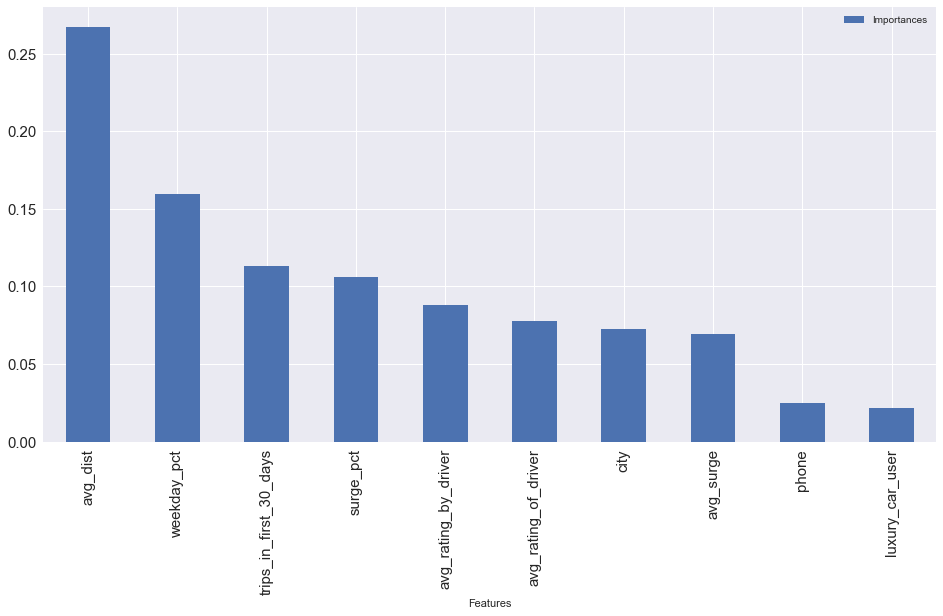

In [285]:
gbc_importances[["Features", "Importances"]].sort_values("Importances", ascending=False).plot.bar(x="Features",fontsize=15)

## Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc = ensemble.RandomForestClassifier()

In [97]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
rfc.score(X_test, y_test)

0.75179219026735267

In [99]:
rfc_scores = model_selection.cross_val_score(rfc, X_train, y_train, cv=5)

In [100]:
np.mean(rfc_scores)

0.75028938313849236

In [101]:
rfc_importances = pd.DataFrame(zip(feature_cols, rfc.feature_importances_), columns=["Features", "Importances"])

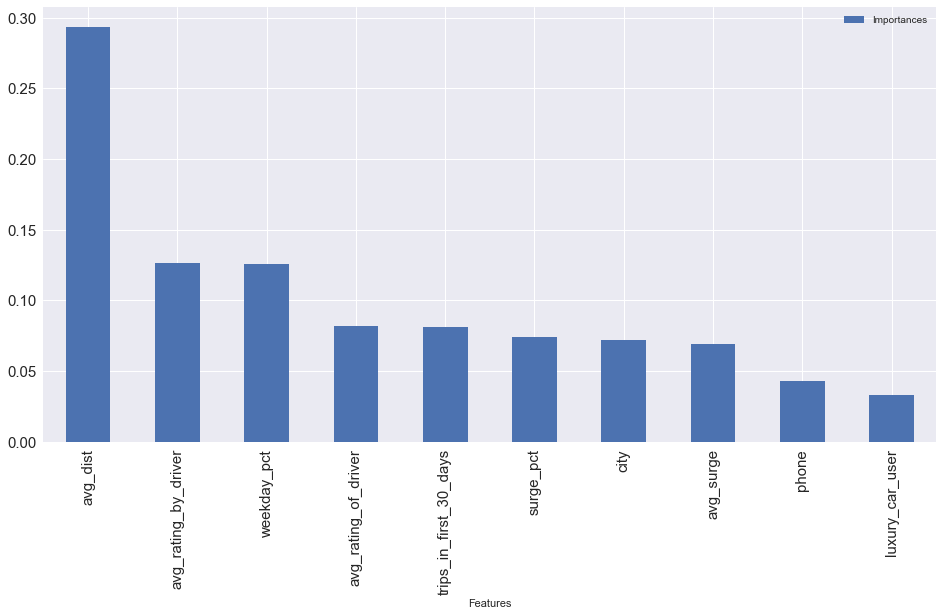

In [278]:
rfc_importances[["Features", "Importances"]].sort_values("Importances", ascending=False).plot.bar(x="Features",fontsize=15)

## AdaBoost

In [264]:
from sklearn.ensemble import AdaBoostClassifier

In [265]:
abc = ensemble.AdaBoostClassifier()

In [266]:
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [267]:
abc.score(X_test, y_test)

0.78831070253858482

In [268]:
abc_scores = model_selection.cross_val_score(rfc, X_train, y_train, cv=5)

In [272]:
np.mean(abc_scores)

0.75365107716940327

In [275]:
abc_importances = pd.DataFrame(zip(feature_cols, abc.feature_importances_), columns=["Features", "Importances"])

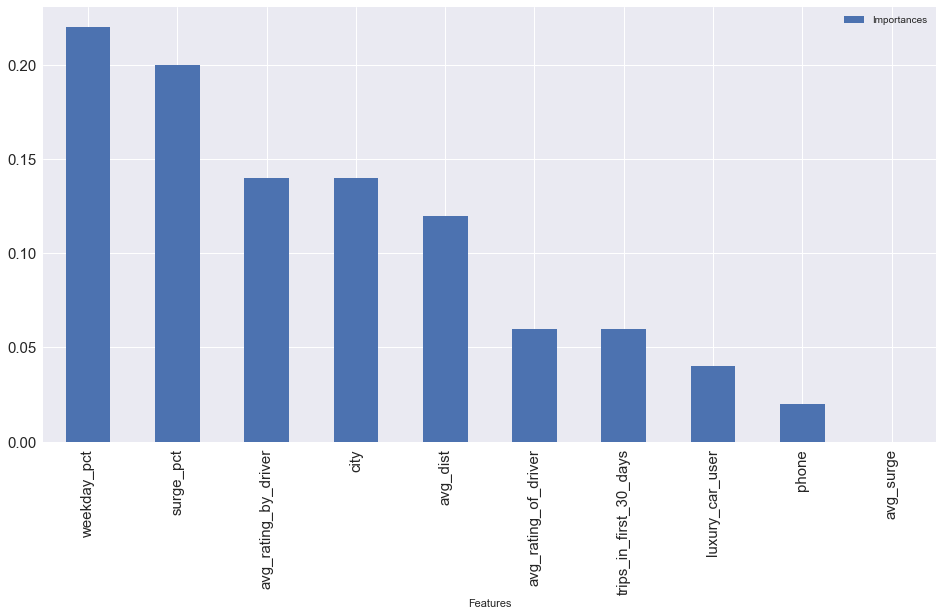

In [276]:
abc_importances[["Features", "Importances"]].sort_values("Importances", ascending=False).plot.bar(x="Features",fontsize=15)

## XG Boost

In [103]:
# booster = xgb.sklearn.XGBModel()

NameError: name 'xgb' is not defined

In [ ]:
booster.fit(X_train, y_train)

In [ ]:
booster.score(X_train, y_train)

## Grid search

In [212]:
#GBC Grid Search
param_grid = {'learning_rate': [0.001, 0.01, 0.1],
             'max_depth': [4, 6],
             'max_features': [0.75, 0.9, 1]}
model = GradientBoostingClassifier(n_estimators=300)

gs_cv = GridSearchCV(model, param_grid, verbose = 2).fit(X_train,y_train)
gs_cv.best_score_, gs_cv.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] max_features=0.75, learning_rate=0.001, max_depth=4 .............
[CV] .... max_features=0.75, learning_rate=0.001, max_depth=4 -   4.9s
[CV] max_features=0.75, learning_rate=0.001, max_depth=4 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s


[CV] .... max_features=0.75, learning_rate=0.001, max_depth=4 -   4.7s
[CV] max_features=0.75, learning_rate=0.001, max_depth=4 .............
[CV] .... max_features=0.75, learning_rate=0.001, max_depth=4 -   4.7s
[CV] max_features=0.9, learning_rate=0.001, max_depth=4 ..............
[CV] ..... max_features=0.9, learning_rate=0.001, max_depth=4 -   5.6s
[CV] max_features=0.9, learning_rate=0.001, max_depth=4 ..............
[CV] ..... max_features=0.9, learning_rate=0.001, max_depth=4 -   5.8s
[CV] max_features=0.9, learning_rate=0.001, max_depth=4 ..............
[CV] ..... max_features=0.9, learning_rate=0.001, max_depth=4 -   6.7s
[CV] max_features=1, learning_rate=0.001, max_depth=4 ................
[CV] ....... max_features=1, learning_rate=0.001, max_depth=4 -   3.2s
[CV] max_features=1, learning_rate=0.001, max_depth=4 ................
[CV] ....... max_features=1, learning_rate=0.001, max_depth=4 -   2.6s
[CV] max_features=1, learning_rate=0.001, max_depth=4 ................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  5.4min finished


NameError: name 'gs_cv_best_score_' is not defined

In [221]:
gbc = gs_cv.best_estimator_
gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [292]:
AdaBoostClassifier().get_params().keys()

['n_estimators',
 'base_estimator',
 'random_state',
 'learning_rate',
 'algorithm']

In [290]:
#ABC Grid Search
param_grid = {'learning_rate': [0.001, 0.01, 0.1]}
abc_model = AdaBoostClassifier(n_estimators=300)

gs_cv_abc = GridSearchCV(abc_model, param_grid, verbose = 2).fit(X_train,y_train)
gs_cv_abc.best_score_, gs_cv_abc.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] learning_rate=0.001 .............................................
[CV] .................................... learning_rate=0.001 -   3.9s
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] .................................... learning_rate=0.001 -   3.9s
[CV] learning_rate=0.001 .............................................
[CV] .................................... learning_rate=0.001 -   3.8s
[CV] learning_rate=0.01 ..............................................
[CV] ..................................... learning_rate=0.01 -   3.9s
[CV] learning_rate=0.01 ..............................................
[CV] ..................................... learning_rate=0.01 -   4.0s
[CV] learning_rate=0.01 ..............................................
[CV] ..................................... learning_rate=0.01 -   3.9s
[CV] learning_rate=0.1 ...............................................
[CV] ...................................... learning_rate=0.1 -   3.9s
[CV] learning_rate=0.1 ...............................................
[CV] ...................................... learning_rate=0.1 -   4.0s
[CV] learning_rate=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   35.2s finished


(0.7831116252168884,
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
           learning_rate=0.1, n_estimators=300, random_state=None))

In [309]:
gs_cv_abc.best_params_, gs_cv_abc.best_score_

({'learning_rate': 0.1}, 0.7831116252168884)

In [310]:
abc = gs_cv_abc.best_estimator_

In [246]:
#RFC Grid Search
param_grid_rf = {'max_depth': [4, 6],
             'max_features': [0.75, 0.9, 1]}
model_rf = RandomForestClassifier(n_estimators=300)

gs_cv_rf = GridSearchCV(model_rf, param_grid_rf, verbose = 2).fit(X_train,y_train)
gs_cv_rf.best_score_, gs_cv_rf.best_estimator_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] max_features=0.75, max_depth=4 ..................................
[CV] ......................... max_features=0.75, max_depth=4 -   4.7s
[CV] max_features=0.75, max_depth=4 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV] ......................... max_features=0.75, max_depth=4 -   4.7s
[CV] max_features=0.75, max_depth=4 ..................................
[CV] ......................... max_features=0.75, max_depth=4 -   4.7s
[CV] max_features=0.9, max_depth=4 ...................................
[CV] .......................... max_features=0.9, max_depth=4 -   5.4s
[CV] max_features=0.9, max_depth=4 ...................................
[CV] .......................... max_features=0.9, max_depth=4 -   5.5s
[CV] max_features=0.9, max_depth=4 ...................................
[CV] .......................... max_features=0.9, max_depth=4 -   5.7s
[CV] max_features=1, max_depth=4 .....................................
[CV] ............................ max_features=1, max_depth=4 -   2.6s
[CV] max_features=1, max_depth=4 .....................................
[CV] ............................ max_features=1, max_depth=4 -   2.6s
[CV] max_features=1, max_depth=4 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.5min finished


(0.7751951995373048,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=6, max_features=0.75, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False))

## Scoring and Comparing

### GBC

In [220]:
gbc_predicts = gbc.predict(X_test)

In [222]:
gbc_cm = metrics.confusion_matrix(y_pred=gbc_predicts , y_true=y_test)
gbc_cm

array([[6503,  934],
       [1456, 2964]])

In [224]:
gbc_cm_tn, gbc_cm_fn, gbc_cm_tp, gbc_cm_fp = gbc_cm[0][0], gbc_cm[1][0], gbc_cm[1][1], gbc_cm[0][1]

In [225]:
print "True Negatives: {} \nFalse Negatives: {} \nTrue Positives: {} \nFalse Positives: {}".format(gbc_cm_tn, gbc_cm_fn, gbc_cm_tp, gbc_cm_fp )

True Negatives: 6503 
False Negatives: 1456 
True Positives: 2964 
False Positives: 934


In [226]:
gbc_accuracy = metrics.accuracy_score(y_pred=gbc_predicts , y_true=y_test)
gbc_accuracy

0.7984313064012819

In [228]:
gbc_precision = metrics.precision_score(y_pred=gbc_predicts , y_true=y_test)
gbc_precision

0.76038994356080036

In [229]:
gbc_recall = metrics.recall_score(y_pred=gbc_predicts , y_true=y_test)
gbc_recall

0.6705882352941176

In [230]:
print gbc_predicts, y_test
metrics.precision_recall_fscore_support(y_pred=gbc_predicts , y_true=y_test)

[ True False False ...,  True False  True] [ True False False ...,  True False  True]


(array([ 0.81706245,  0.76038994]),
 array([ 0.87441173,  0.67058824]),
 array([ 0.84476487,  0.71267132]),
 array([7437, 4420]))

#### RFC

In [249]:
rfc_predicts = rfc.predict(X_test)

In [250]:
rfc_cm = metrics.confusion_matrix(y_pred=rfc_predicts , y_true=y_test)
rfc_cm

array([[6248, 1189],
       [1754, 2666]])

In [253]:
rfc_cm_tn, rfc_cm_fn, rfc_cm_tp, rfc_cm_fp = rfc_cm[0][0], rfc_cm[1][0], rfc_cm[1][1], rfc_cm[0][1]

In [255]:
print "True Negatives: {} \nFalse Negatives: {} \nTrue Positives: {} \nFalse Positives: {}".format(rfc_cm_tn, rfc_cm_fn, rfc_cm_tp, rfc_cm_fp )

True Negatives: 6248 
False Negatives: 1754 
True Positives: 2666 
False Positives: 1189


In [257]:
rfc_accuracy = metrics.accuracy_score(y_pred=rfc_predicts , y_true=y_test)
rfc_accuracy

0.75179219026735267

In [258]:
rfc_precision = metrics.precision_score(y_pred=rfc_predicts , y_true=y_test)
rfc_precision

0.69156939040207521

In [260]:
rfc_recall = metrics.recall_score(y_pred=gbc_predicts , y_true=y_test)
rfc_recall

0.6705882352941176

In [261]:
metrics.precision_recall_fscore_support(y_pred=rfc_predicts , y_true=y_test)

(array([ 0.7808048 ,  0.69156939]),
 array([ 0.84012371,  0.60316742]),
 array([ 0.80937885,  0.64435045]),
 array([7437, 4420]))

#### ABC

In [312]:
abc_predicts = abc.predict(X_test)

In [313]:
abc_cm = metrics.confusion_matrix(y_pred=abc_predicts , y_true=y_test)
abc_cm

array([[6547,  890],
       [1671, 2749]])

In [317]:
abc_cm_tn, abc_cm_fn, abc_cm_tp, abc_cm_fp = abc_cm[0][0], abc_cm[1][0], abc_cm[1][1], abc_cm[0][1]

In [318]:
print "True Negatives: {} \nFalse Negatives: {} \nTrue Positives: {} \nFalse Positives: {}".format(abc_cm_tn, abc_cm_fn, abc_cm_tp, abc_cm_fp )

True Negatives: 6547 
False Negatives: 1671 
True Positives: 2749 
False Positives: 890


In [323]:
abc_accuracy = metrics.accuracy_score(y_pred=abc_predicts , y_true=y_test)
abc_accuracy

0.78400944589693855

In [324]:
abc_precision = metrics.precision_score(y_pred=abc_predicts , y_true=y_test)
abc_precision

0.75542731519648254

In [325]:
abc_recall = metrics.recall_score(y_pred=abc_predicts , y_true=y_test)
abc_recall

0.62194570135746607

In [334]:
abc_metrics = metrics.precision_recall_fscore_support(y_pred=abc_predicts , y_true=y_test)
abc_metrics

(array([ 0.79666586,  0.75542732]),
 array([ 0.88032809,  0.6219457 ]),
 array([ 0.83641009,  0.68221864]),
 array([7437, 4420]))

In [336]:
abc_metrics[,2]

SyntaxError: invalid syntax (<ipython-input-336-ef8b107a65bd>, line 1)

In [ ]:
scores_dict = {"Gradient Boosted Tree Classifier":gbc_accuracy}

In [ ]:
scores_df = pd.DataFrame.from_dict(datadict, orient='index').reset_index()
scores_df.columns=["accurracy", "precision", "recall"]

### ROC Curve

In [300]:
gbc_probs = gbc.predict_proba(X_test)
print gbc_probs[:, 0]


[ 0.38593073  0.71775104  0.96641026 ...,  0.31066956  0.61880747
  0.21335977]


In [294]:
gbc_probs = gbc.decision_function(X_test)
print gbc_probs

[ 0.46444982 -0.93333324 -3.3593678  ...,  0.79699092 -0.48448961
  1.30479122]


In [296]:
rfc_probs = rfc.predict_proba(X_test)
print rfc_probs

[[ 0.5  0.5]
 [ 0.8  0.2]
 [ 1.   0. ]
 ..., 
 [ 0.   1. ]
 [ 0.6  0.4]
 [ 0.3  0.7]]


In [298]:
abc.decision_function(X_test)

array([ 0.00183686, -0.03134785, -0.06421364, ...,  0.00619204,
       -0.00729208,  0.02483267])

In [297]:
abc_probs = abc.predict_proba(X_test)
print abc_probs

[[ 0.49954078  0.50045922]
 [ 0.50783632  0.49216368]
 [ 0.51604789  0.48395211]
 ..., 
 [ 0.498452    0.501548  ]
 [ 0.50182301  0.49817699]
 [ 0.49379215  0.50620785]]


In [233]:
metrics.roc_curve(y_test, gbc_probas[:,0])

(array([  0.00000000e+00,   1.34462821e-04,   6.05082695e-03, ...,
          9.99865537e-01,   1.00000000e+00,   1.00000000e+00]),
 array([ 0.        ,  0.        ,  0.        , ...,  0.99298643,
         0.99298643,  1.        ]),
 array([ 1.99701416,  0.99701416,  0.98815221, ...,  0.02685906,
         0.02648262,  0.00901362]))

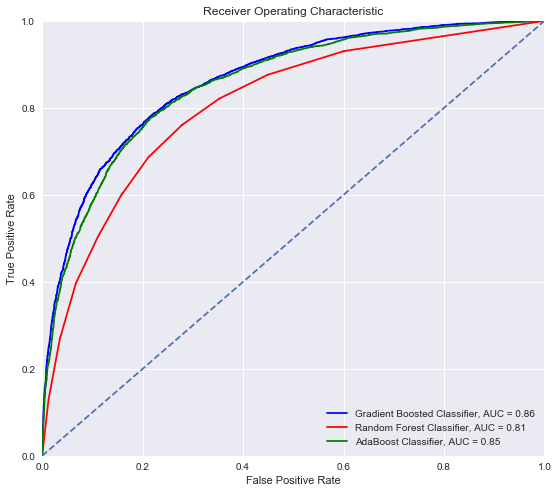

In [308]:
gbc_fpr, gbc_tpr, gbc_threshold = metrics.roc_curve(y_test, gbc_probs[:,1])
gbc_roc_auc = metrics.auc(fpr, tpr)

rfc_fpr, rfc_tpr, gbc_threshold = metrics.roc_curve(y_test, rfc_probs[:,1])
rfc_roc_auc = metrics.auc(rfc_fpr, rfc_tpr)

abc_fpr, abc_tpr, abc_threshold = metrics.roc_curve(y_test, abc_probs[:,1])
abc_roc_auc = metrics.auc(abc_fpr, abc_tpr)


import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
plt.title('Receiver Operating Characteristic')
plt.plot(gbc_fpr, gbc_tpr, 'b', label = 'Gradient Boosted Classifier, AUC = %0.2f' % gbc_roc_auc)
plt.plot(rfc_fpr, rfc_tpr, 'r', label = 'Random Forest Classifier, AUC = %0.2f' % rfc_roc_auc)
plt.plot(abc_fpr, abc_tpr, 'g', label = 'AdaBoost Classifier, AUC = %0.2f' % abc_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()